In [ ]:
import urllib.request
import os
import json
from google.colab import files
from google.colab import drive
import string
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud

df_bitcoin = pd.read_csv('/content/drive/MyDrive/bitcoin.csv')
df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date']).dt.date

df_dogecoin = pd.read_csv('/content/drive/MyDrive/dogecoin.csv')
df_dogecoin['date'] = pd.to_datetime(df_dogecoin['date'], format = '%Y-%m-%d')

# Gráficos BERT e Bitcoin

## Modelo de laurens88

In [ ]:
df_gpt_results = pd.read_csv("/content/drive/MyDrive/results-BERT/label_bert_laurens88_tweets.csv")
df_gpt_results['date'] = pd.to_datetime(df_gpt_results['date']).dt.date

In [ ]:
df_gpt_results

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...  NEGATIVE
1    2013-05-25  am not suggesting shutting down co2 production...   NEUTRAL
2    2013-05-03  guaranteeing the world s best resale value in ...  POSITIVE
3    2013-05-03  yes  this does put an indirect floor on resale...  POSITIVE
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin   NEUTRAL
263  2022-01-08  monthly subscription price will rise when fsd ...  POSITIVE
264  2022-01-08  fsd price will rise as we get closer to fsd pr...  POSITIVE
265  2022-01-08           tesla fsd price rising to  12k on jan 17  POSITIVE

[266 rows x 3 columns]

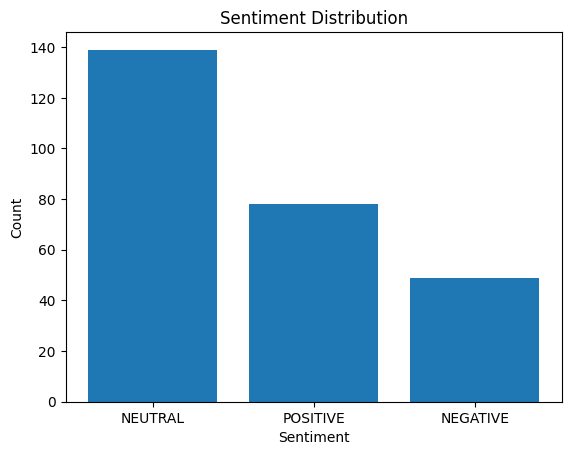

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

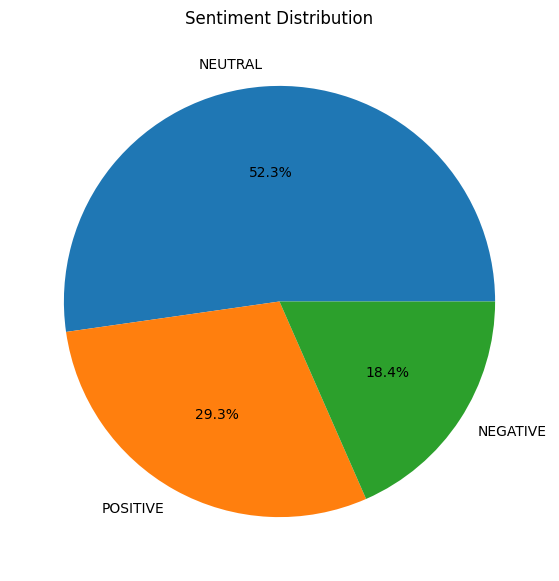

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-491-3ae35d4b4638>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


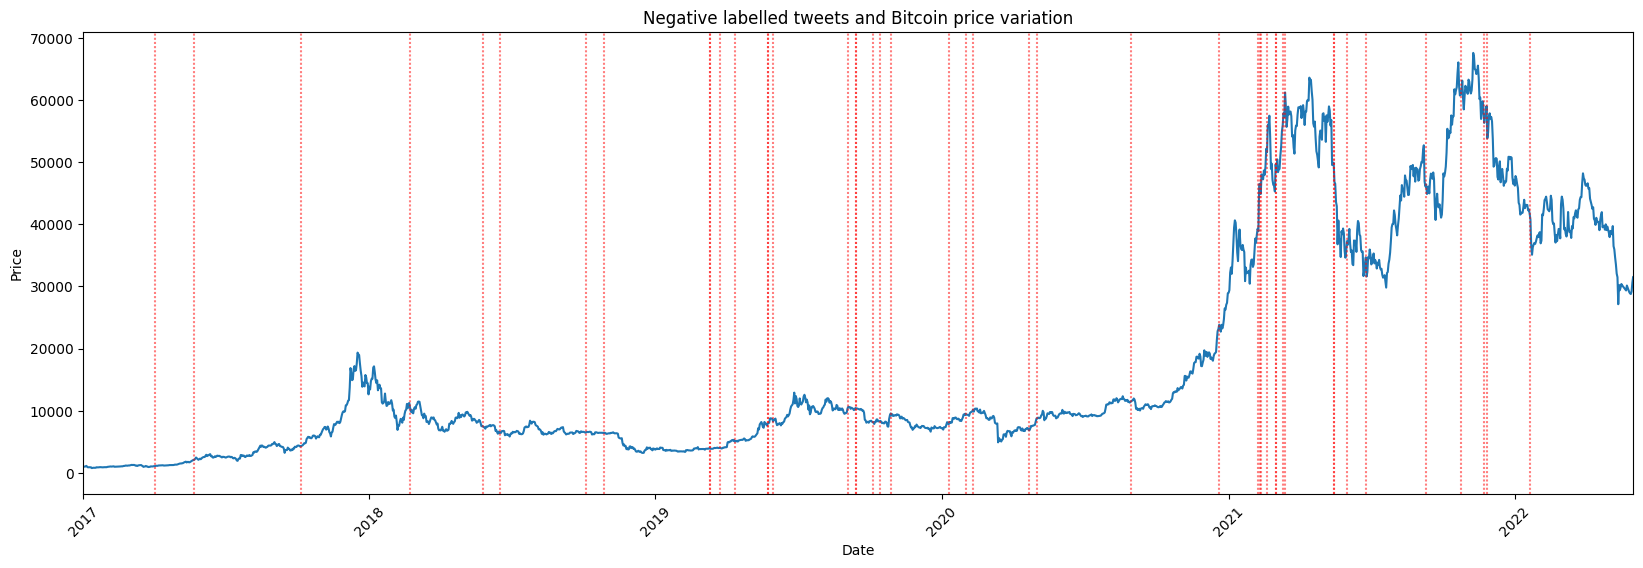

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Bitcoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


Tweets que podem influenciar:

In [ ]:
print( str(a.iloc[12]['date']) +  ' : "' + a.iloc[12]['clean_tweet'] + '"')
print( str(a.iloc[13]['date']) +  ' : "' + a.iloc[13]['clean_tweet'] + '"')
print( str(a.iloc[14]['date']) +  ' : "' + a.iloc[14]['clean_tweet'] + '"')

2019-03-12 : "in retrospect  lower price shouldn t have been offered  was done so because some simply couldn t afford it  prices revert to normal on monday "
2019-03-12 : "tesla car prices go up  3  next week  except for  35k model 3  order online at before then for current prices "
2019-03-24 : "every car company is constantly changing prices  but nobody cares"


Tweets com label duvidoso

In [ ]:
print( str(a.iloc[0]['date']) +  ' : "' + a.iloc[0]['clean_tweet'] + '"')

2013-06-28 : "taking action  will be a 7 day grace period for  2500 ext warranty  neg margin at that price  so must unfortunately raise "


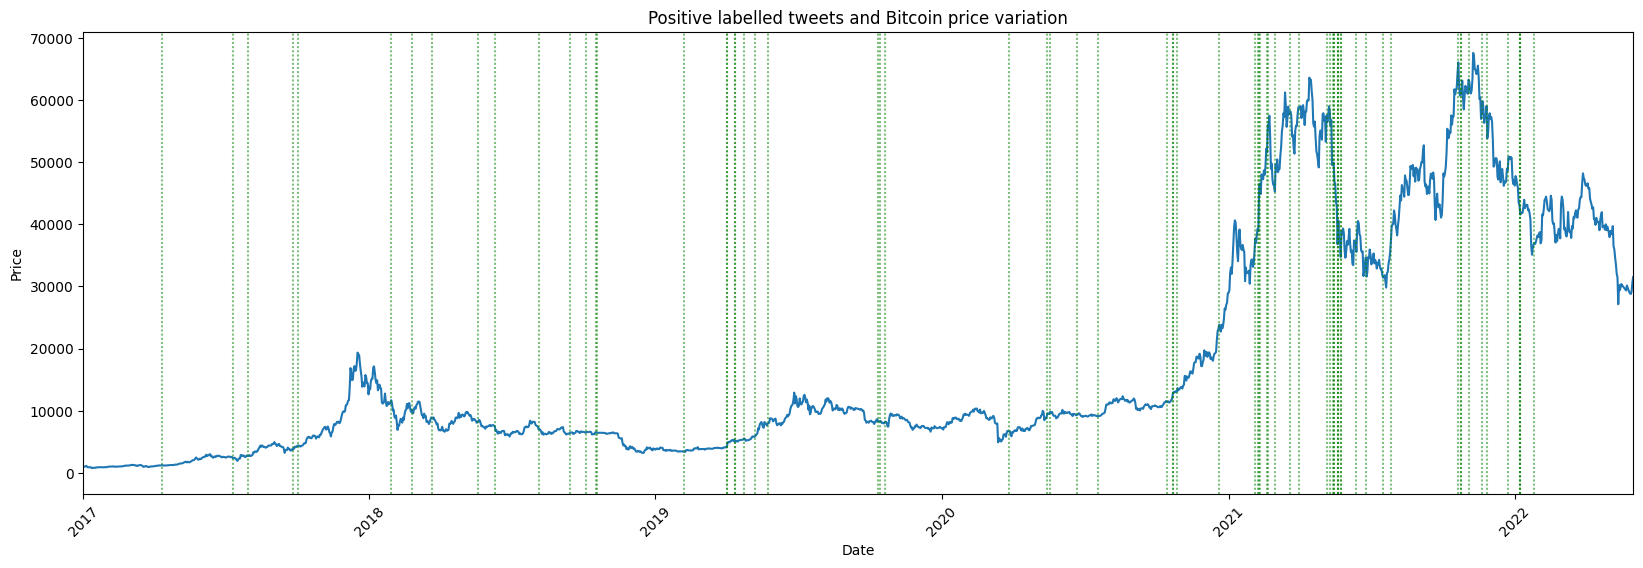

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'POSITIVE']

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Bitcoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [ ]:
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df_gpt_results['sentiment_encoded'] = df_gpt_results['Sentiment'].map(sentiment_mapping)

In [ ]:
grouped_data = df_gpt_results.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              0
1    2013-05-03              3
2    2013-05-25              0
3    2013-06-28             -1
4    2014-01-23             -1
..          ...            ...
186  2021-12-23              1
187  2022-01-08              3
188  2022-01-14              0
189  2022-01-21             -1
190  2022-01-25              1

[191 rows x 2 columns]

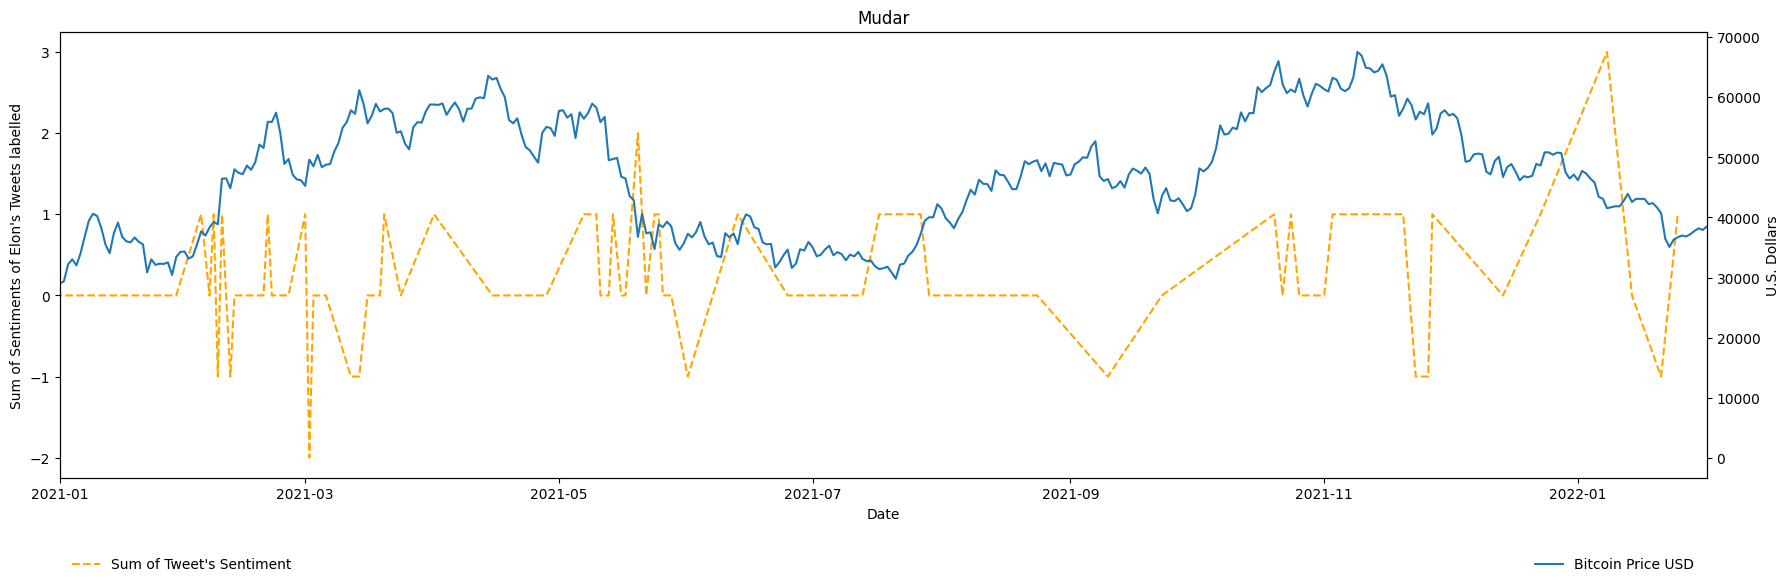

In [ ]:


fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'], linestyle='-', label='Bitcoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-02-01")    # Replace with your desired end date
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


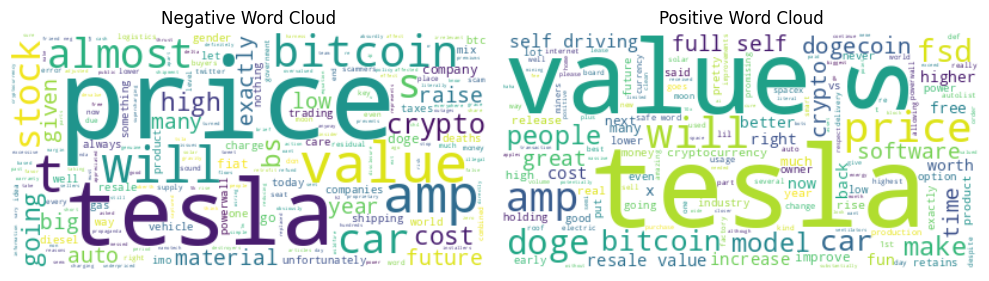

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/results-BERT/label_bert_laurens88_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()


## Modelo de svalabs

In [ ]:
df_gpt_results = pd.read_csv("/content/drive/MyDrive/results-BERT/label_bert_svalabs_tweets.csv")
df_gpt_results['date'] = pd.to_datetime(df_gpt_results['date']).dt.date

In [ ]:
df_gpt_results

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...   NEUTRAL
1    2013-05-25  am not suggesting shutting down co2 production...  POSITIVE
2    2013-05-03  guaranteeing the world s best resale value in ...   NEUTRAL
3    2013-05-03  yes  this does put an indirect floor on resale...   NEUTRAL
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin   NEUTRAL
263  2022-01-08  monthly subscription price will rise when fsd ...  POSITIVE
264  2022-01-08  fsd price will rise as we get closer to fsd pr...  POSITIVE
265  2022-01-08           tesla fsd price rising to  12k on jan 17  POSITIVE

[266 rows x 3 columns]

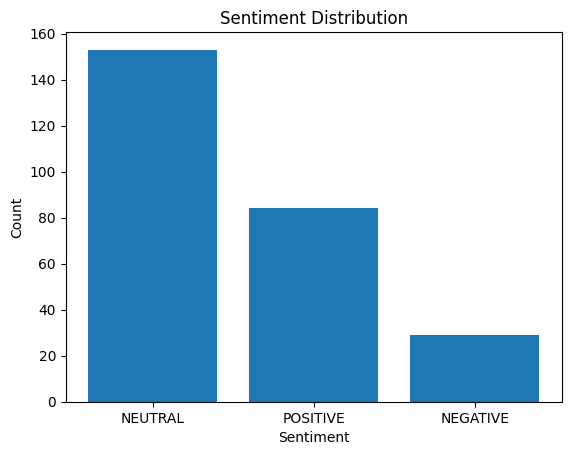

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

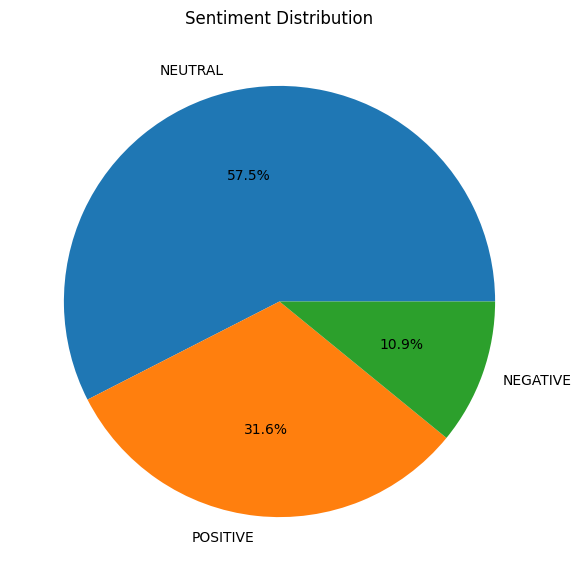

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-503-3ae35d4b4638>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


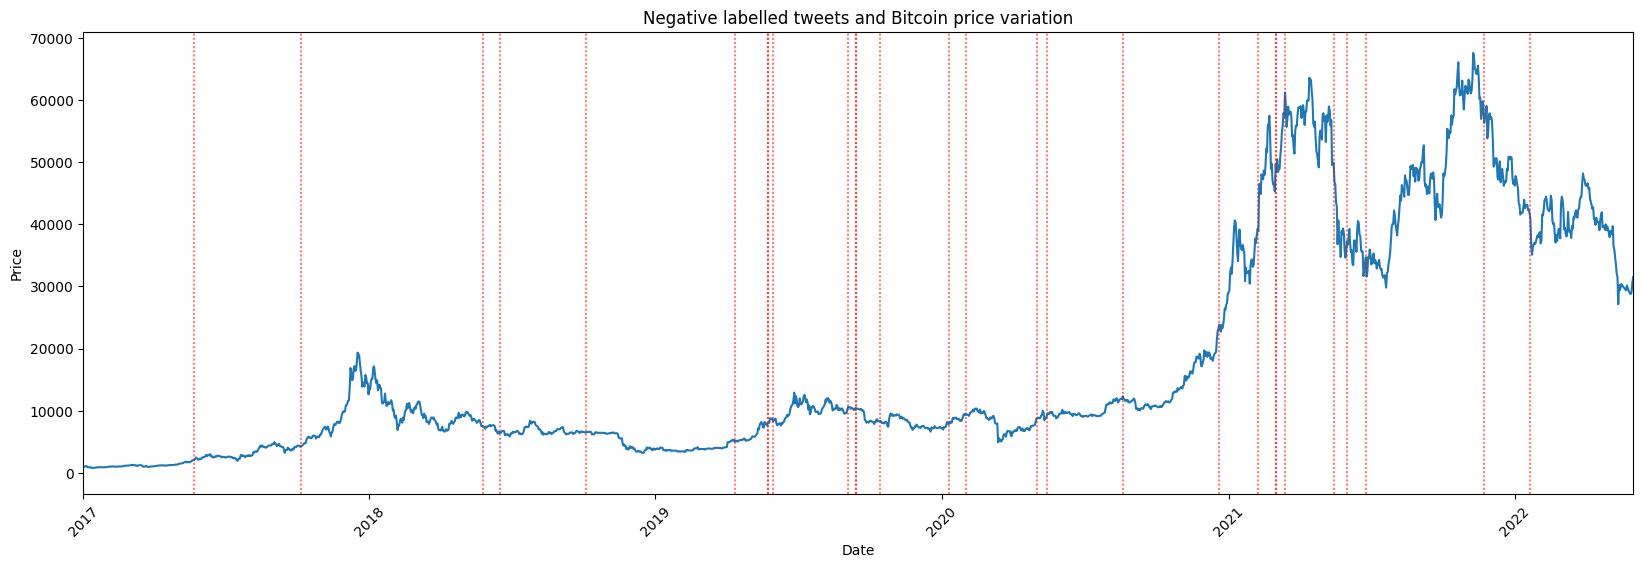

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Bitcoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


Tweets que podem influenciar:

In [ ]:
print( str(a.iloc[12]['date']) +  ' : "' + a.iloc[12]['clean_tweet'] + '"')
print( str(a.iloc[13]['date']) +  ' : "' + a.iloc[13]['clean_tweet'] + '"')
print( str(a.iloc[14]['date']) +  ' : "' + a.iloc[14]['clean_tweet'] + '"')

2019-09-14 : "should note that these product mix  amp  logistics errors also results in regional  undersupply   eg uk  amp  ireland right now  but we don t raise the prices even so  the intent  at any given moment in time  is  heads we lose  tails buyers win "
2019-10-14 : "oberth effect is not well appreciated  value of high thrust low in gravity well is not captured in simple delta v equation  one of the reasons we favor ch4 over h2 "
2020-01-10 : "bitcoin is  not  my safe word"


Tweets com label duvidoso

In [ ]:
print( str(a.iloc[0]['date']) +  ' : "' + a.iloc[0]['clean_tweet'] + '"')

2015-03-16 : "some people seem to think i tweet to affect share price  this is false  a brief rise in  tsla stock obviously does no good for tesla or me "


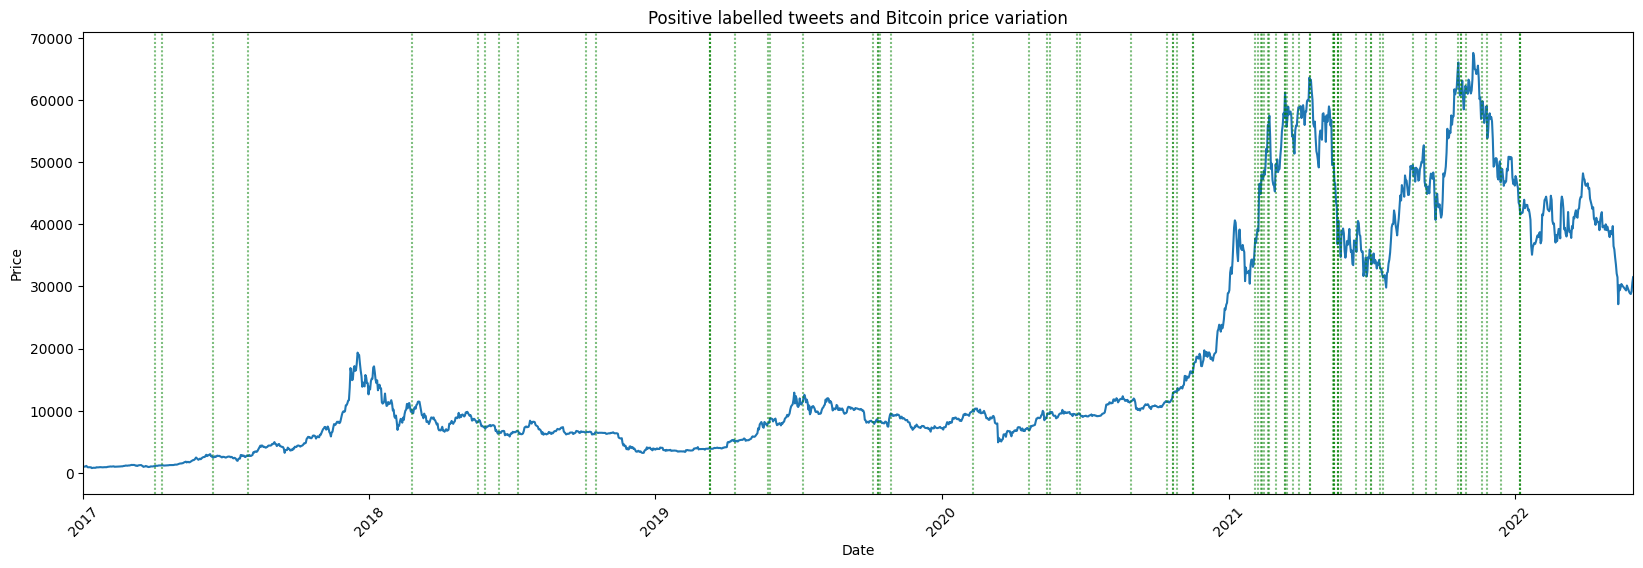

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'POSITIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Bitcoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [ ]:
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df_gpt_results['sentiment_encoded'] = df_gpt_results['Sentiment'].map(sentiment_mapping)

In [ ]:
grouped_data = df_gpt_results.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              0
1    2013-05-03              1
2    2013-05-25              1
3    2013-06-28              0
4    2014-01-23              0
..          ...            ...
186  2021-12-23              0
187  2022-01-08              3
188  2022-01-14              0
189  2022-01-21             -1
190  2022-01-25              0

[191 rows x 2 columns]

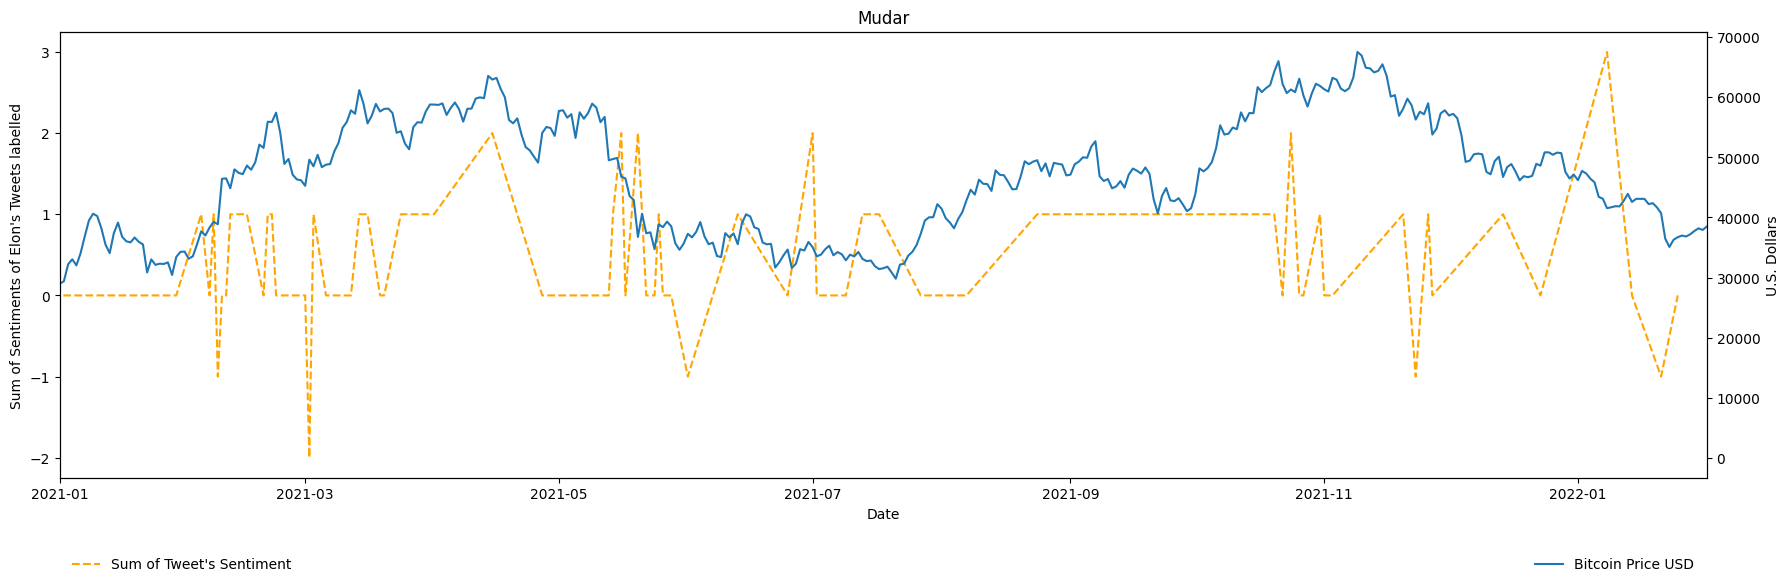

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'], linestyle='-', label='Bitcoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-02-01")    # Replace with your desired end date
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**WordCLoud**

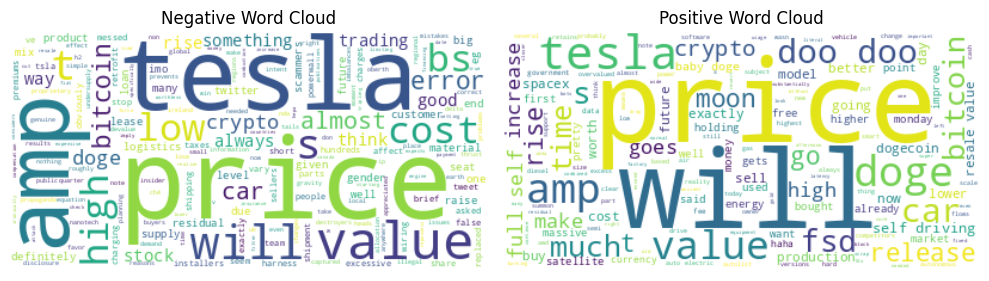

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/results-BERT/label_bert_svalabs_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()


## Modelo de zainlaq7

In [ ]:
df_gpt_results = pd.read_csv("/content/drive/MyDrive/results-BERT/label_bert_zainalq7_tweets.csv")
df_gpt_results['date'] = pd.to_datetime(df_gpt_results['date']).dt.date

In [ ]:
df_gpt_results

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...  NEGATIVE
1    2013-05-25  am not suggesting shutting down co2 production...  NEGATIVE
2    2013-05-03  guaranteeing the world s best resale value in ...  POSITIVE
3    2013-05-03  yes  this does put an indirect floor on resale...  POSITIVE
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin  POSITIVE
263  2022-01-08  monthly subscription price will rise when fsd ...  POSITIVE
264  2022-01-08  fsd price will rise as we get closer to fsd pr...  POSITIVE
265  2022-01-08           tesla fsd price rising to  12k on jan 17  POSITIVE

[266 rows x 3 columns]

In [ ]:
df_bitcoin

date  bitcoin_price  stonks
0     2010-07-19         0.0858       0
1     2010-07-20         0.0808      -1
2     2010-07-21         0.0747      -1
3     2010-07-22         0.0792       1
4     2010-07-23         0.0505      -1
...          ...            ...     ...
4342  2022-07-04     19115.5200      -1
4343  2022-07-05     19129.0000       1
4344  2022-07-06     20205.6075       1
4345  2022-07-07     19930.8450      -1
4346  2022-07-11     21296.0050       1

[4347 rows x 3 columns]

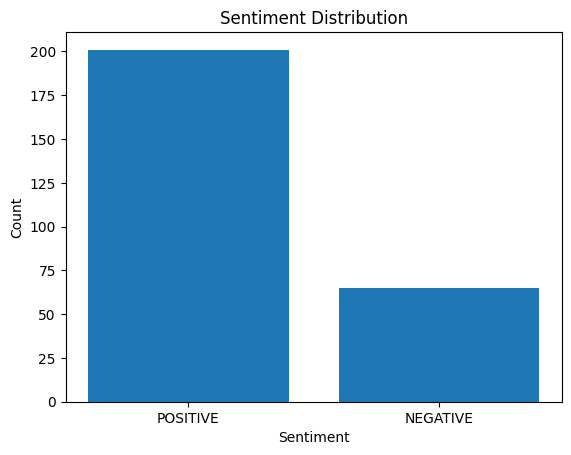

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

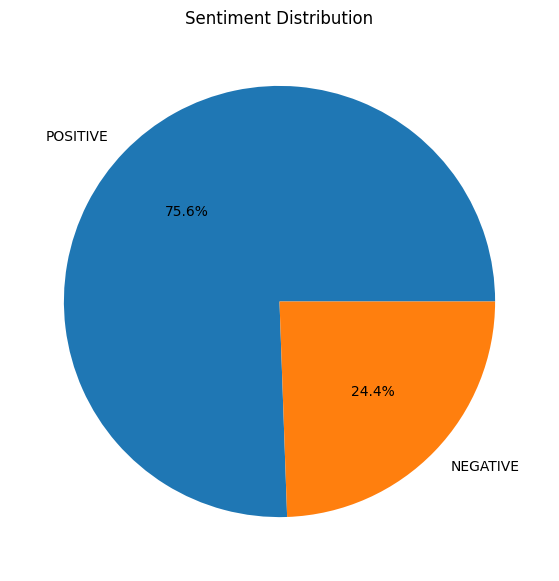

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-516-3ae35d4b4638>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


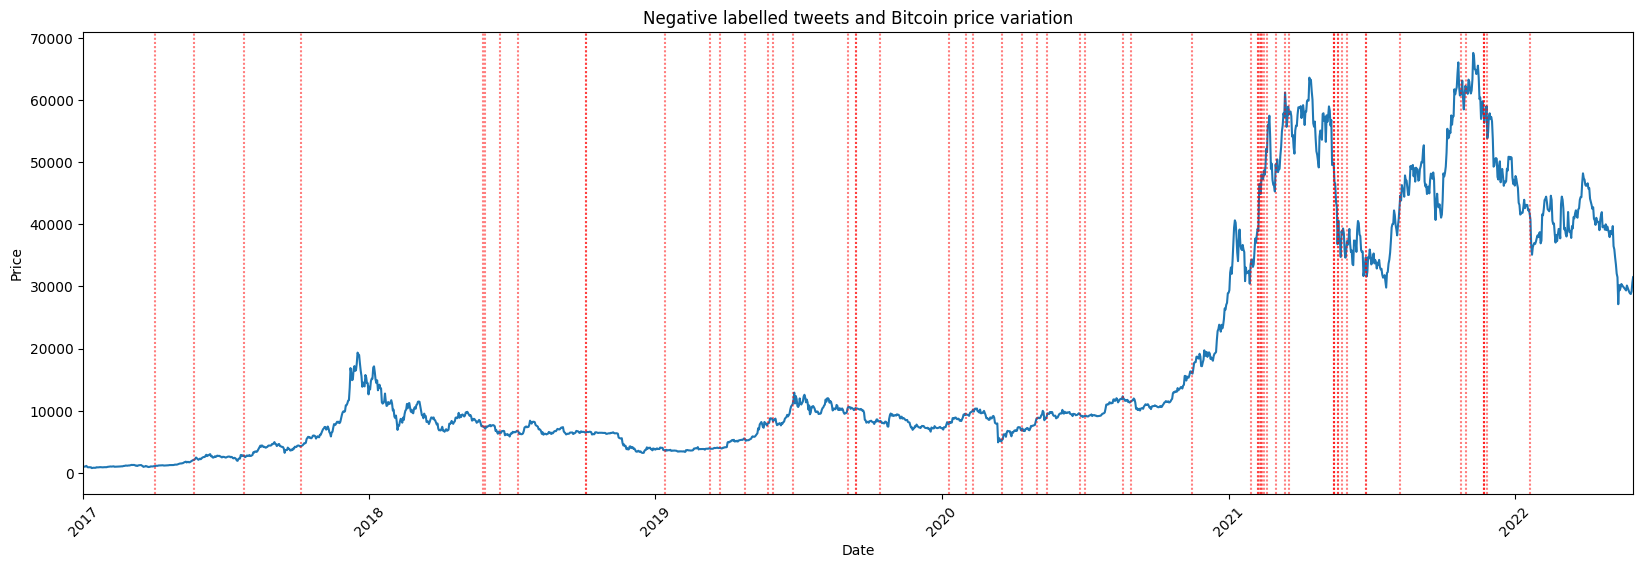

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Bitcoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


Tweets que podem influenciar:

In [ ]:
print( str(a.iloc[12]['date']) +  ' : "' + a.iloc[12]['clean_tweet'] + '"')
print( str(a.iloc[13]['date']) +  ' : "' + a.iloc[13]['clean_tweet'] + '"')
print( str(a.iloc[14]['date']) +  ' : "' + a.iloc[14]['clean_tweet'] + '"')

2018-10-04 : "if you think tesla is overvalued compared to probable value of future cash flows  sell  otherwise  buy "
2018-10-04 : "exactly  short sellers are value destroyers  should definitely be illegal "
2019-01-13 : "which country  there is a 10  import duty   20  vat  us prices don t include sales tax  and about  2000 in extra shipping cost  but it shouldn t add up to  25k "


Tweets com label duvidoso

In [ ]:
print( str(a.iloc[0]['date']) +  ' : "' + a.iloc[0]['clean_tweet'] + '"')

2013-05-25 : "am not suggesting shutting down co2 production  but rather to price in environmental cost  amp  shift to sustainable energy"


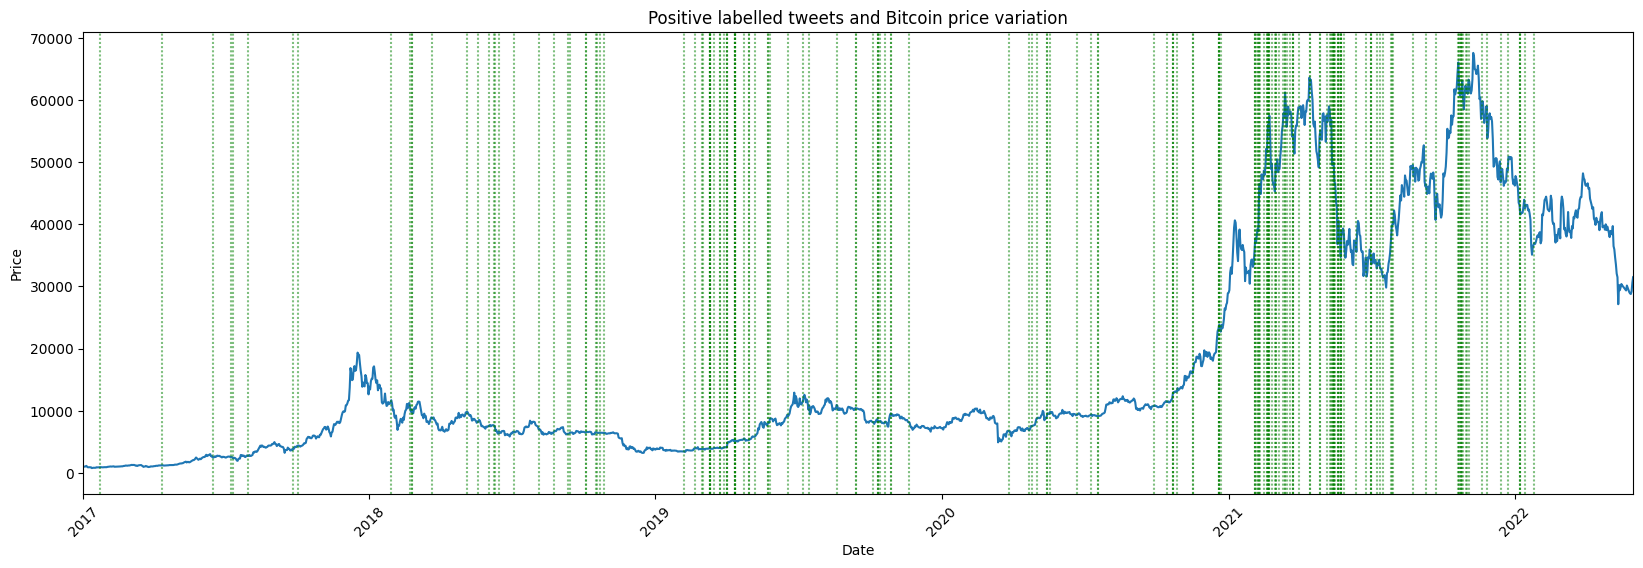

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'POSITIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Bitcoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [ ]:
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1}
df_gpt_results['sentiment_encoded'] = df_gpt_results['Sentiment'].map(sentiment_mapping)

In [ ]:
grouped_data = df_gpt_results.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              1
1    2013-05-03              4
2    2013-05-25             -1
3    2013-06-28             -1
4    2014-01-23              1
..          ...            ...
186  2021-12-23              1
187  2022-01-08              3
188  2022-01-14              1
189  2022-01-21             -1
190  2022-01-25              1

[191 rows x 2 columns]

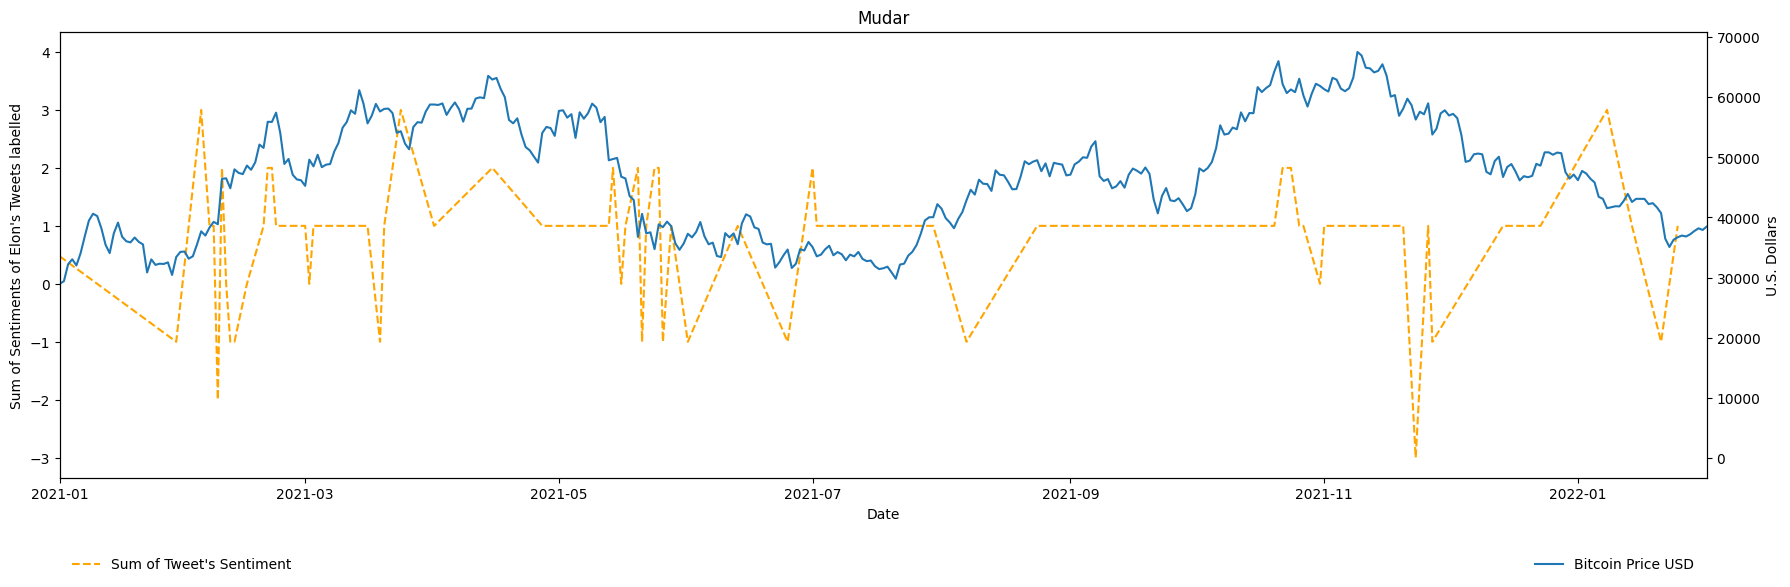

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_bitcoin['date'], df_bitcoin['bitcoin_price'], linestyle='-', label='Bitcoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-02-01")    # Replace with your desired end date
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**WordCLoud**

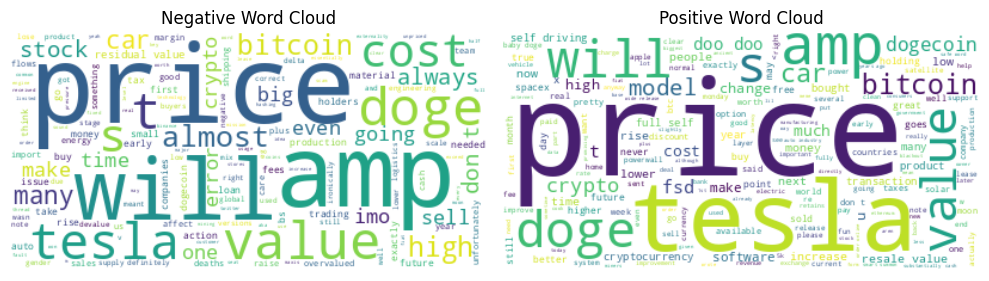

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/results-BERT/label_bert_zainalq7_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Gráficos BERT e Dogecoin

## Modelo de laurens88

In [ ]:
df_gpt_results = pd.read_csv("/content/drive/MyDrive/results-BERT/label_bert_laurens88_tweets.csv")
df_gpt_results['date'] = pd.to_datetime(df_gpt_results['date']).dt.date

In [ ]:
df_gpt_results

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...  NEGATIVE
1    2013-05-25  am not suggesting shutting down co2 production...   NEUTRAL
2    2013-05-03  guaranteeing the world s best resale value in ...  POSITIVE
3    2013-05-03  yes  this does put an indirect floor on resale...  POSITIVE
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin   NEUTRAL
263  2022-01-08  monthly subscription price will rise when fsd ...  POSITIVE
264  2022-01-08  fsd price will rise as we get closer to fsd pr...  POSITIVE
265  2022-01-08           tesla fsd price rising to  12k on jan 17  POSITIVE

[266 rows x 3 columns]

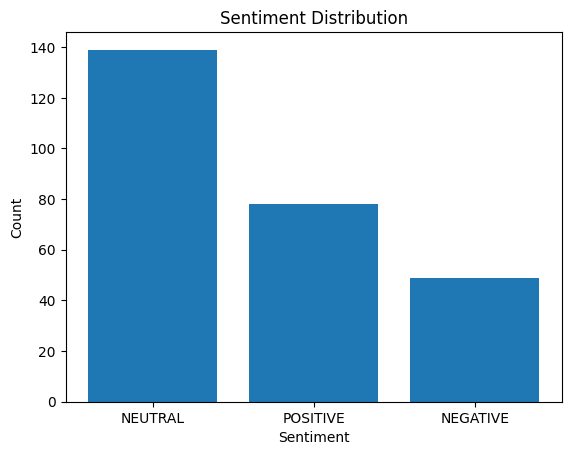

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

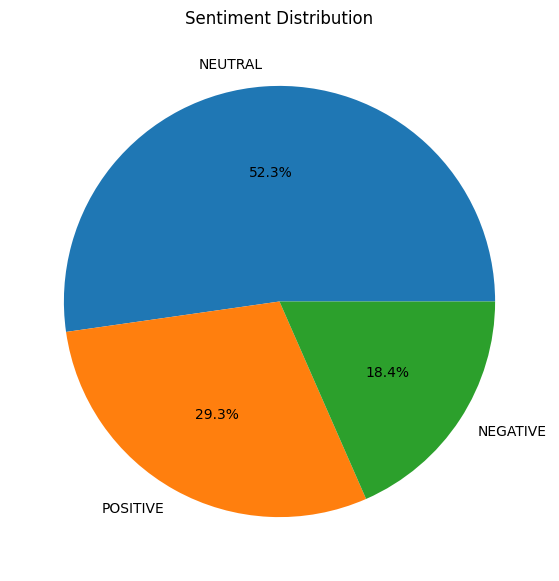

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-24-b2d195568932>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


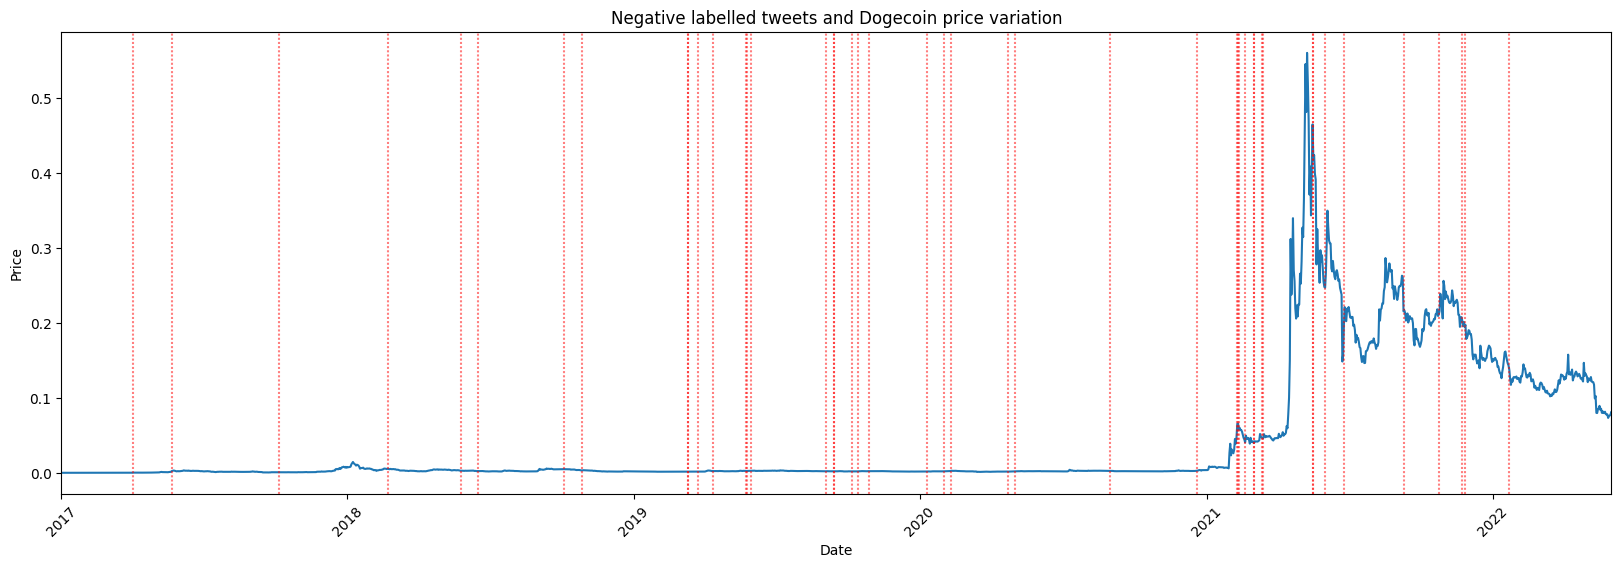

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


Tweets que podem influenciar:

In [ ]:
print( str(a.iloc[12]['date']) +  ' : "' + a.iloc[12]['clean_tweet'] + '"')
print( str(a.iloc[13]['date']) +  ' : "' + a.iloc[13]['clean_tweet'] + '"')
print( str(a.iloc[14]['date']) +  ' : "' + a.iloc[14]['clean_tweet'] + '"')

2019-03-12 : "in retrospect  lower price shouldn t have been offered  was done so because some simply couldn t afford it  prices revert to normal on monday "
2019-03-12 : "tesla car prices go up  3  next week  except for  35k model 3  order online at before then for current prices "
2019-03-24 : "every car company is constantly changing prices  but nobody cares"


Tweets com label duvidoso

In [ ]:
print( str(a.iloc[0]['date']) +  ' : "' + a.iloc[0]['clean_tweet'] + '"')

2013-06-28 : "taking action  will be a 7 day grace period for  2500 ext warranty  neg margin at that price  so must unfortunately raise "


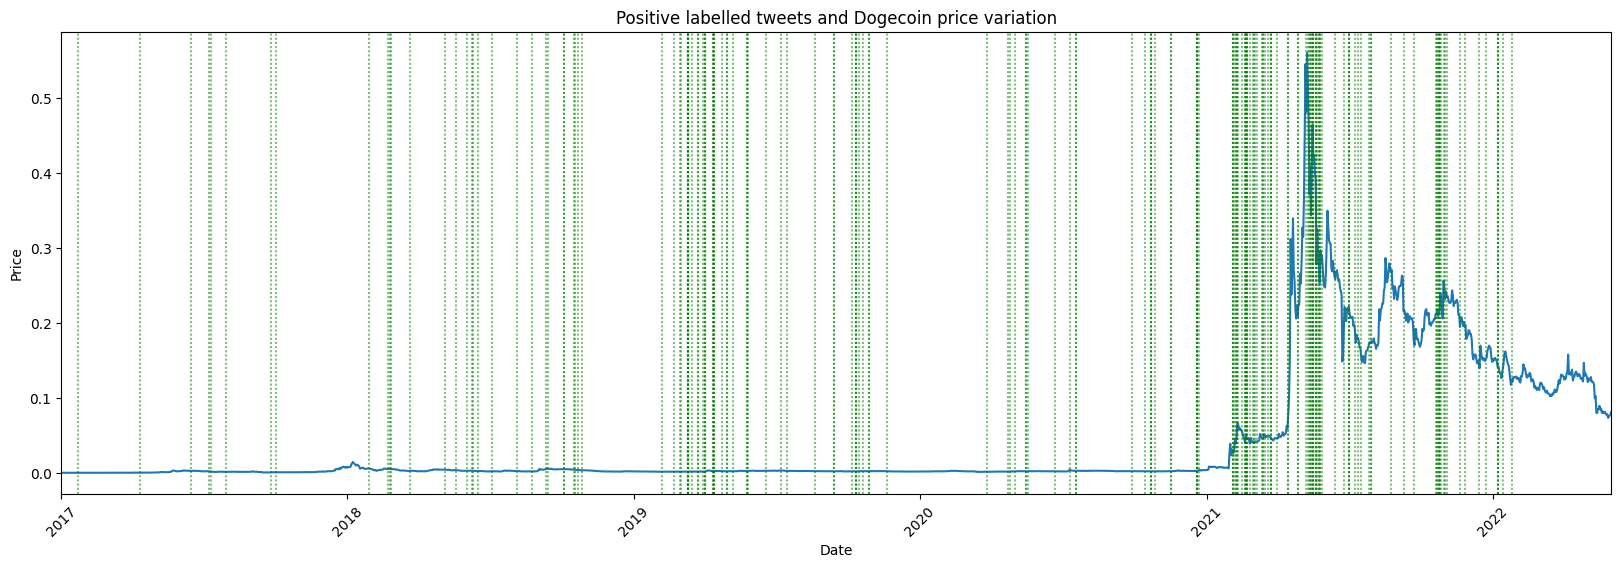

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'POSITIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [ ]:
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df_gpt_results['sentiment_encoded'] = df_gpt_results['Sentiment'].map(sentiment_mapping)

In [ ]:
grouped_data = df_gpt_results.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              0
1    2013-05-03              3
2    2013-05-25              0
3    2013-06-28             -1
4    2014-01-23             -1
..          ...            ...
186  2021-12-23              1
187  2022-01-08              3
188  2022-01-14              0
189  2022-01-21             -1
190  2022-01-25              1

[191 rows x 2 columns]

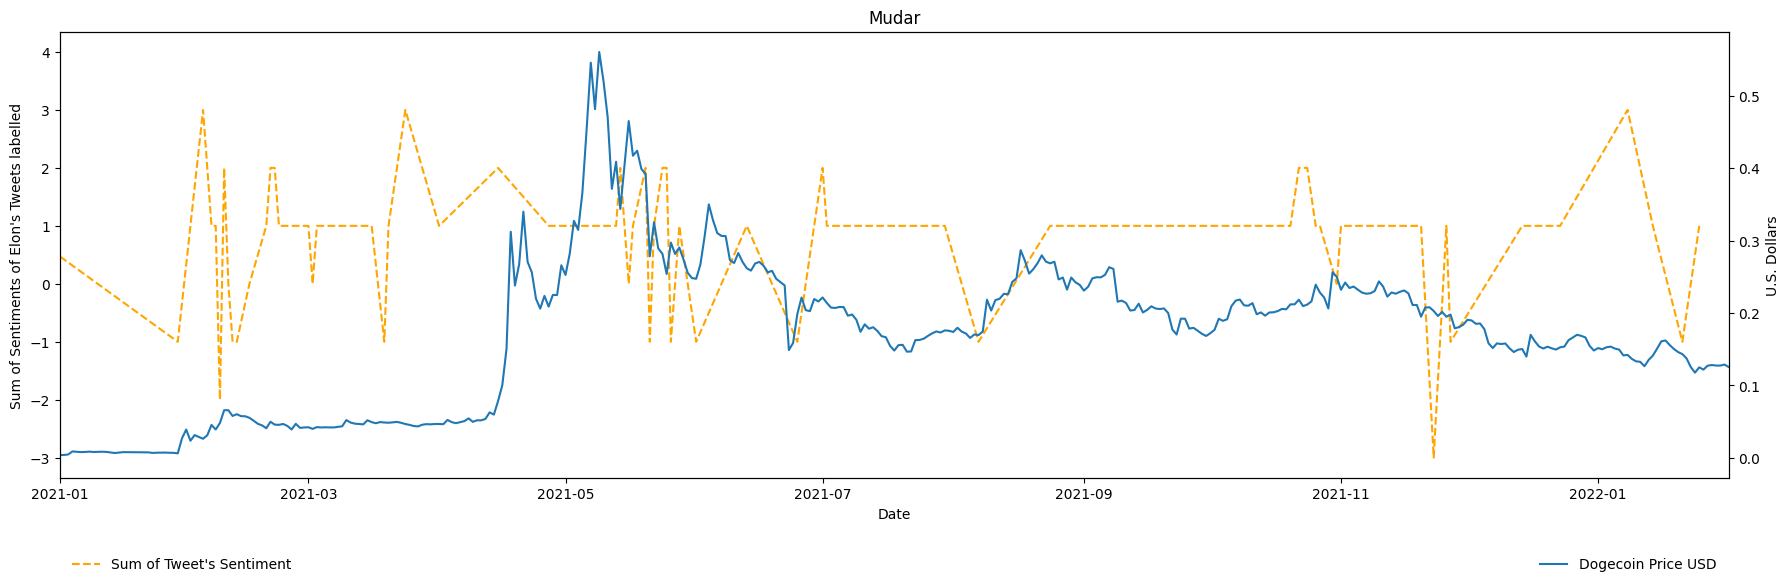

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'], linestyle='-', label='Dogecoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-02-01")    # Replace with your desired end date
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**WordCLoud**

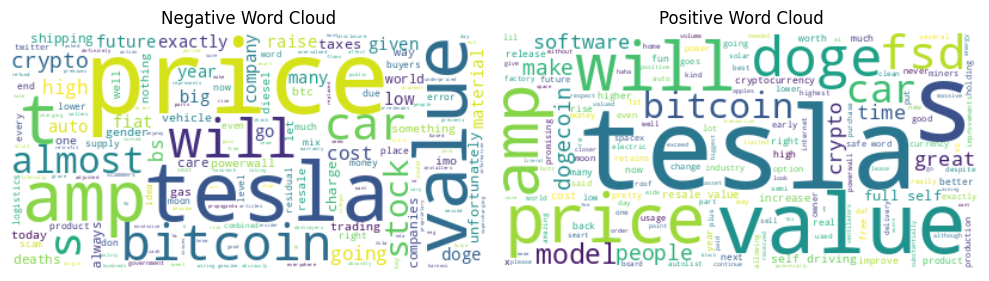

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/results-BERT/label_bert_laurens88_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()


## Modelo de svalabs

In [ ]:
df_gpt_results = pd.read_csv("/content/drive/MyDrive/results-BERT/label_bert_svalabs_tweets.csv")
df_gpt_results['date'] = pd.to_datetime(df_gpt_results['date']).dt.date

In [ ]:
df_gpt_results

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...   NEUTRAL
1    2013-05-25  am not suggesting shutting down co2 production...  POSITIVE
2    2013-05-03  guaranteeing the world s best resale value in ...   NEUTRAL
3    2013-05-03  yes  this does put an indirect floor on resale...   NEUTRAL
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin   NEUTRAL
263  2022-01-08  monthly subscription price will rise when fsd ...  POSITIVE
264  2022-01-08  fsd price will rise as we get closer to fsd pr...  POSITIVE
265  2022-01-08           tesla fsd price rising to  12k on jan 17  POSITIVE

[266 rows x 3 columns]

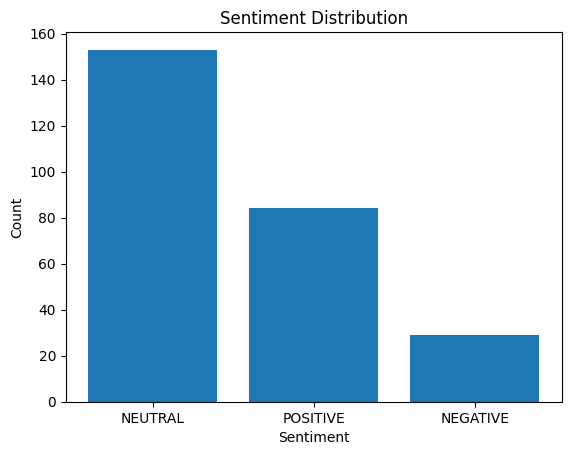

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

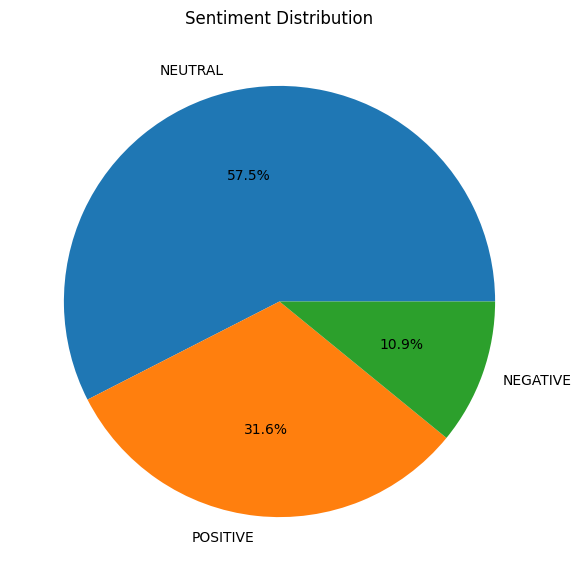

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-61-b2d195568932>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


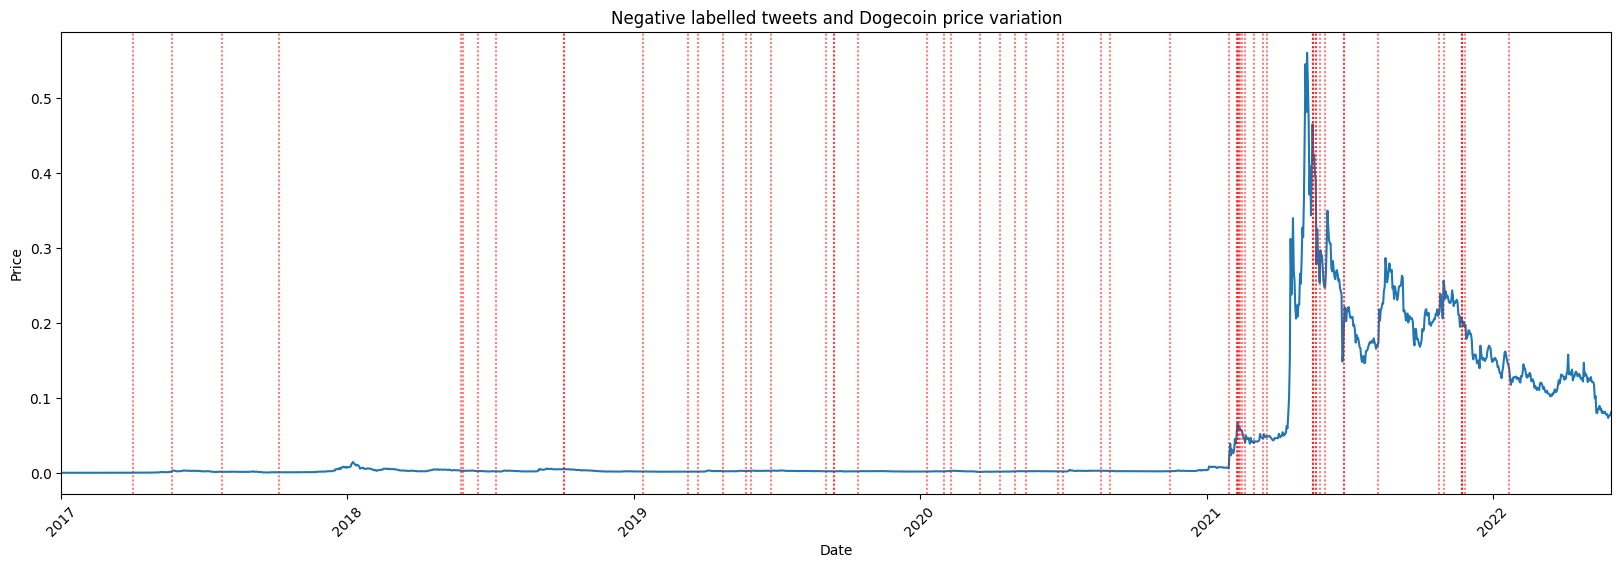

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


Tweets que podem influenciar:

In [ ]:
print( str(a.iloc[12]['date']) +  ' : "' + a.iloc[12]['clean_tweet'] + '"')
print( str(a.iloc[13]['date']) +  ' : "' + a.iloc[13]['clean_tweet'] + '"')
print( str(a.iloc[14]['date']) +  ' : "' + a.iloc[14]['clean_tweet'] + '"')

2019-09-14 : "should note that these product mix  amp  logistics errors also results in regional  undersupply   eg uk  amp  ireland right now  but we don t raise the prices even so  the intent  at any given moment in time  is  heads we lose  tails buyers win "
2019-10-14 : "oberth effect is not well appreciated  value of high thrust low in gravity well is not captured in simple delta v equation  one of the reasons we favor ch4 over h2 "
2020-01-10 : "bitcoin is  not  my safe word"


Tweets com label duvidoso

In [ ]:
print( str(a.iloc[0]['date']) +  ' : "' + a.iloc[0]['clean_tweet'] + '"')

2015-03-16 : "some people seem to think i tweet to affect share price  this is false  a brief rise in  tsla stock obviously does no good for tesla or me "


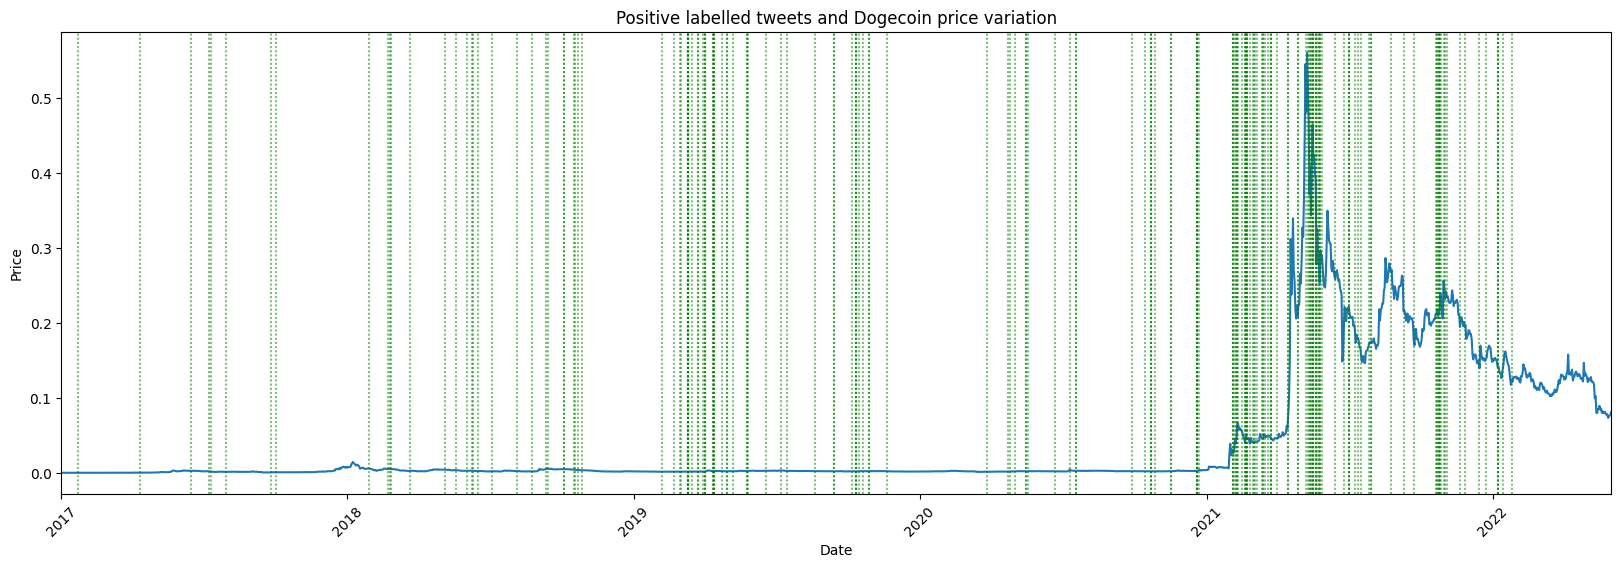

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'POSITIVE']

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [ ]:
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df_gpt_results['sentiment_encoded'] = df_gpt_results['Sentiment'].map(sentiment_mapping)

In [ ]:
grouped_data = df_gpt_results.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              0
1    2013-05-03              1
2    2013-05-25              1
3    2013-06-28              0
4    2014-01-23              0
..          ...            ...
186  2021-12-23              0
187  2022-01-08              3
188  2022-01-14              0
189  2022-01-21             -1
190  2022-01-25              0

[191 rows x 2 columns]

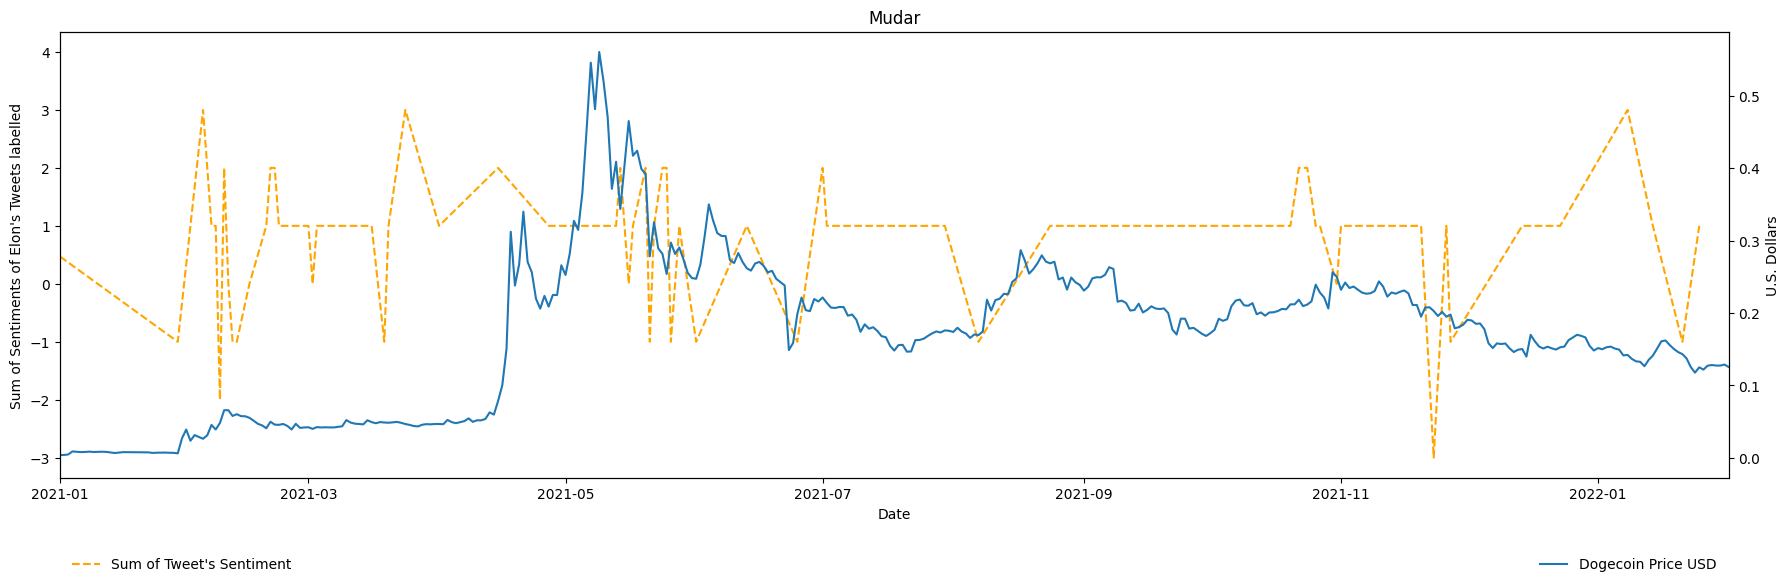

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'], linestyle='-', label='Dogecoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-02-01")    # Replace with your desired end date
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**WordCLoud**

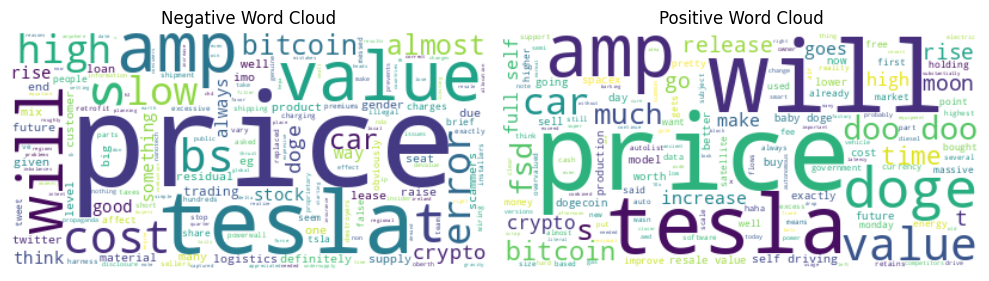

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/results-BERT/label_bert_svalabs_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()


## Modelo de zainlaq7

In [ ]:
df_gpt_results = pd.read_csv("/content/drive/MyDrive/results-BERT/label_bert_zainalq7_tweets.csv")
df_gpt_results['date'] = pd.to_datetime(df_gpt_results['date']).dt.date

In [ ]:
df_gpt_results

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...  NEGATIVE
1    2013-05-25  am not suggesting shutting down co2 production...  NEGATIVE
2    2013-05-03  guaranteeing the world s best resale value in ...  POSITIVE
3    2013-05-03  yes  this does put an indirect floor on resale...  POSITIVE
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin  POSITIVE
263  2022-01-08  monthly subscription price will rise when fsd ...  POSITIVE
264  2022-01-08  fsd price will rise as we get closer to fsd pr...  POSITIVE
265  2022-01-08           tesla fsd price rising to  12k on jan 17  POSITIVE

[266 rows x 3 columns]

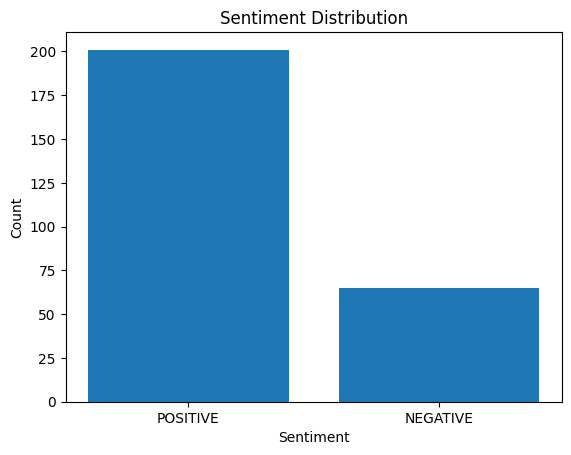

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

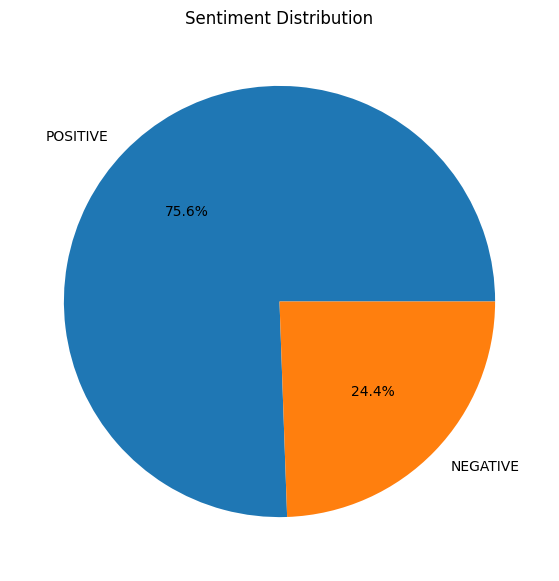

In [ ]:
sentiment_counts = df_gpt_results['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-64-a9aed15a2af2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


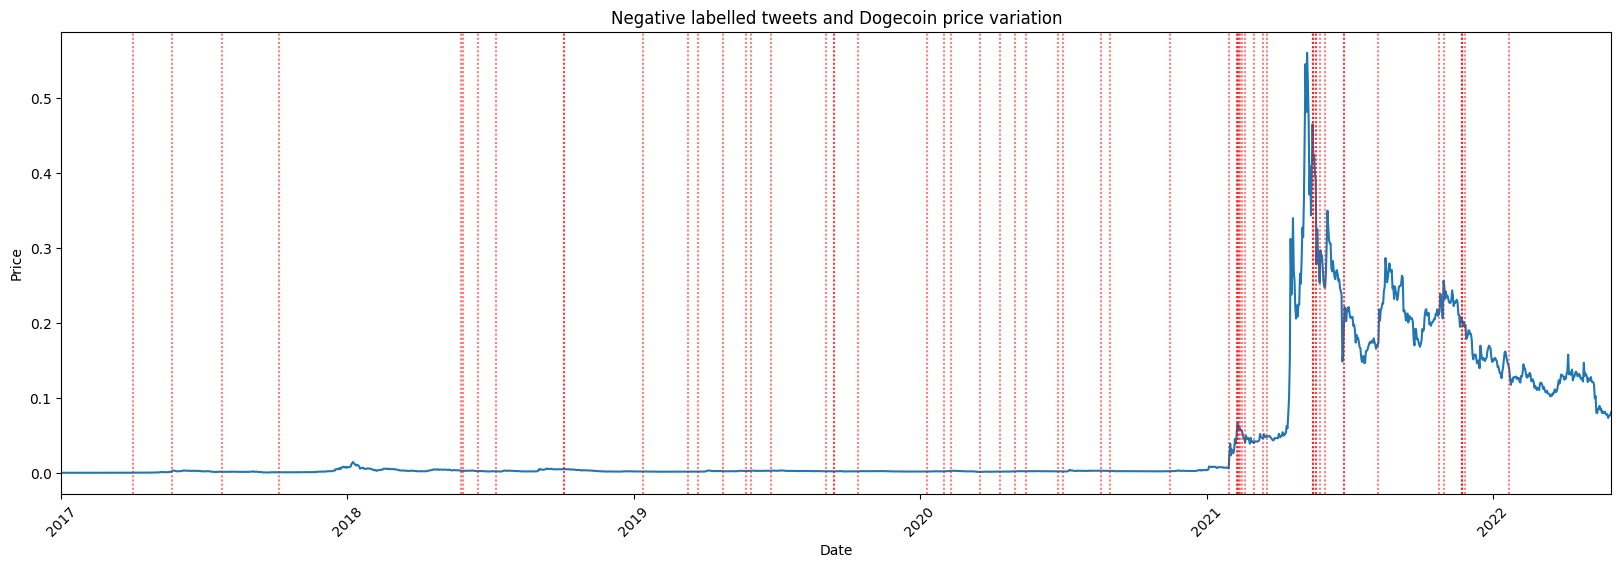

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


Tweets que podem influenciar:

In [ ]:
print( str(a.iloc[12]['date']) +  ' : "' + a.iloc[12]['clean_tweet'] + '"')
print( str(a.iloc[13]['date']) +  ' : "' + a.iloc[13]['clean_tweet'] + '"')
print( str(a.iloc[14]['date']) +  ' : "' + a.iloc[14]['clean_tweet'] + '"')

2018-10-04 : "if you think tesla is overvalued compared to probable value of future cash flows  sell  otherwise  buy "
2018-10-04 : "exactly  short sellers are value destroyers  should definitely be illegal "
2019-01-13 : "which country  there is a 10  import duty   20  vat  us prices don t include sales tax  and about  2000 in extra shipping cost  but it shouldn t add up to  25k "


Tweets com label duvidoso

In [ ]:
print( str(a.iloc[0]['date']) +  ' : "' + a.iloc[0]['clean_tweet'] + '"')

2013-05-25 : "am not suggesting shutting down co2 production  but rather to price in environmental cost  amp  shift to sustainable energy"


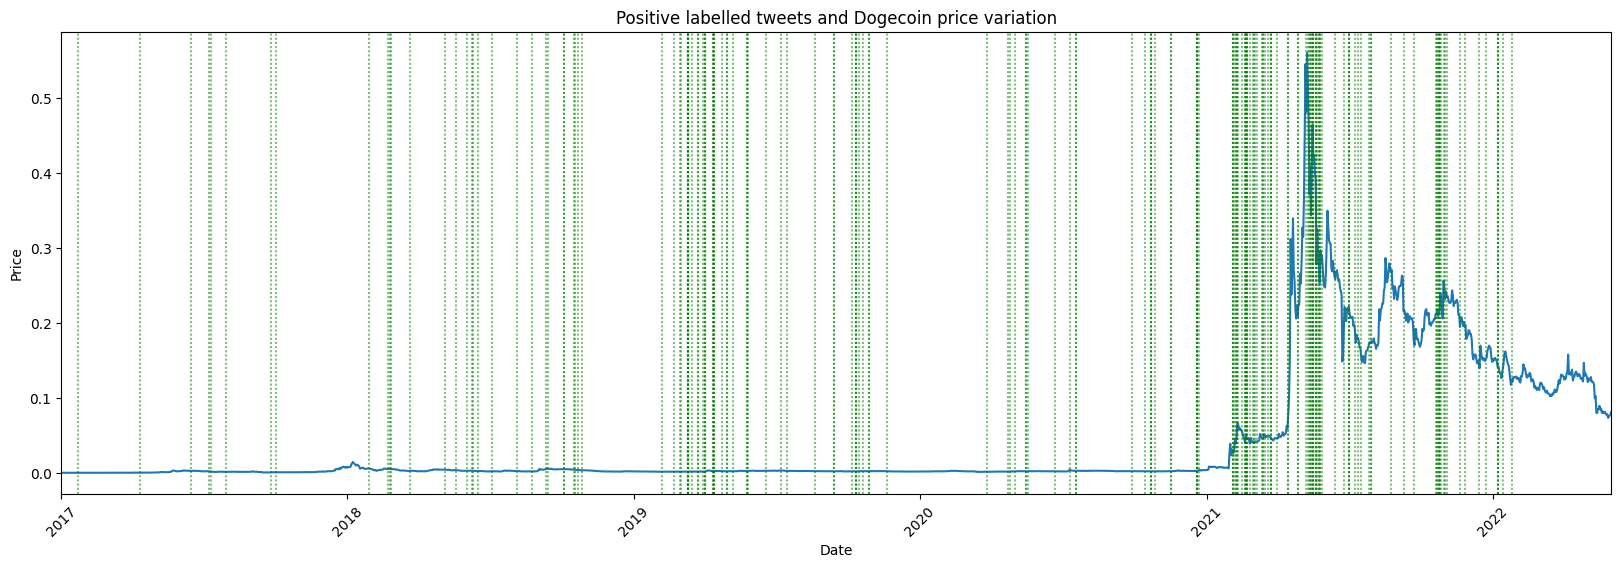

In [ ]:
a = df_gpt_results[df_gpt_results['Sentiment'] == 'POSITIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [ ]:
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1}
df_gpt_results['sentiment_encoded'] = df_gpt_results['Sentiment'].map(sentiment_mapping)

In [ ]:
grouped_data = df_gpt_results.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              1
1    2013-05-03              4
2    2013-05-25             -1
3    2013-06-28             -1
4    2014-01-23              1
..          ...            ...
186  2021-12-23              1
187  2022-01-08              3
188  2022-01-14              1
189  2022-01-21             -1
190  2022-01-25              1

[191 rows x 2 columns]

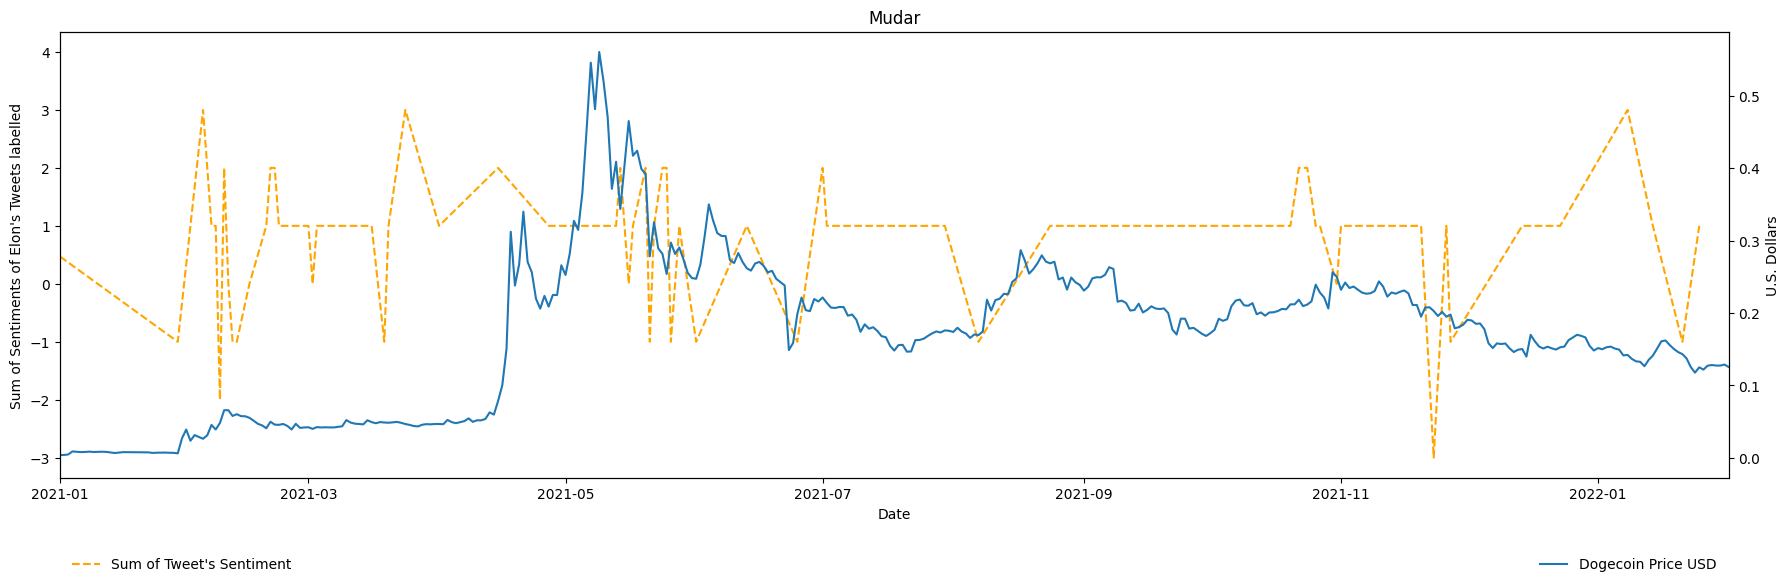

In [ ]:


fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'], linestyle='-', label='Dogecoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-02-01")    # Replace with your desired end date
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**WordCLoud**

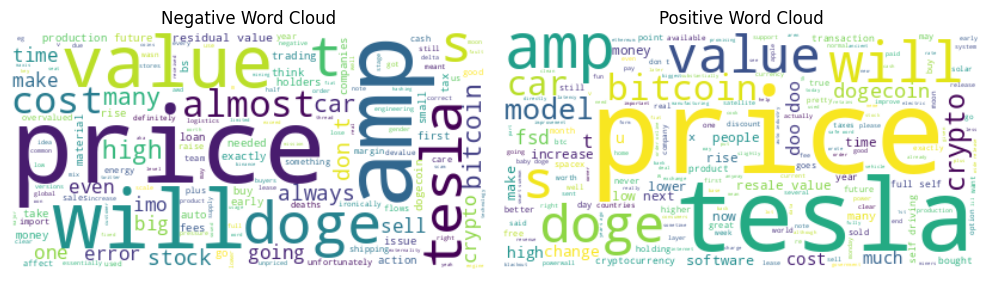

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/results-BERT/label_bert_zainalq7_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()
